In [18]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplhep
mplhep.style.use(["LHCbTex2"])
input_tree = uproot.open({"/work/guenther/reco_tuner/data/param_data_selected.root": "Selected"})
array = input_tree.arrays()
array["dSlope_fringe"] = array["tx_ref"] - array["tx"]
array["z_mag_x_fringe"] = (array["x"] - array["x_ref"] - array["tx"] * array["z"] + array["tx_ref"] * array["z_ref"] ) / array["dSlope_fringe"]

(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

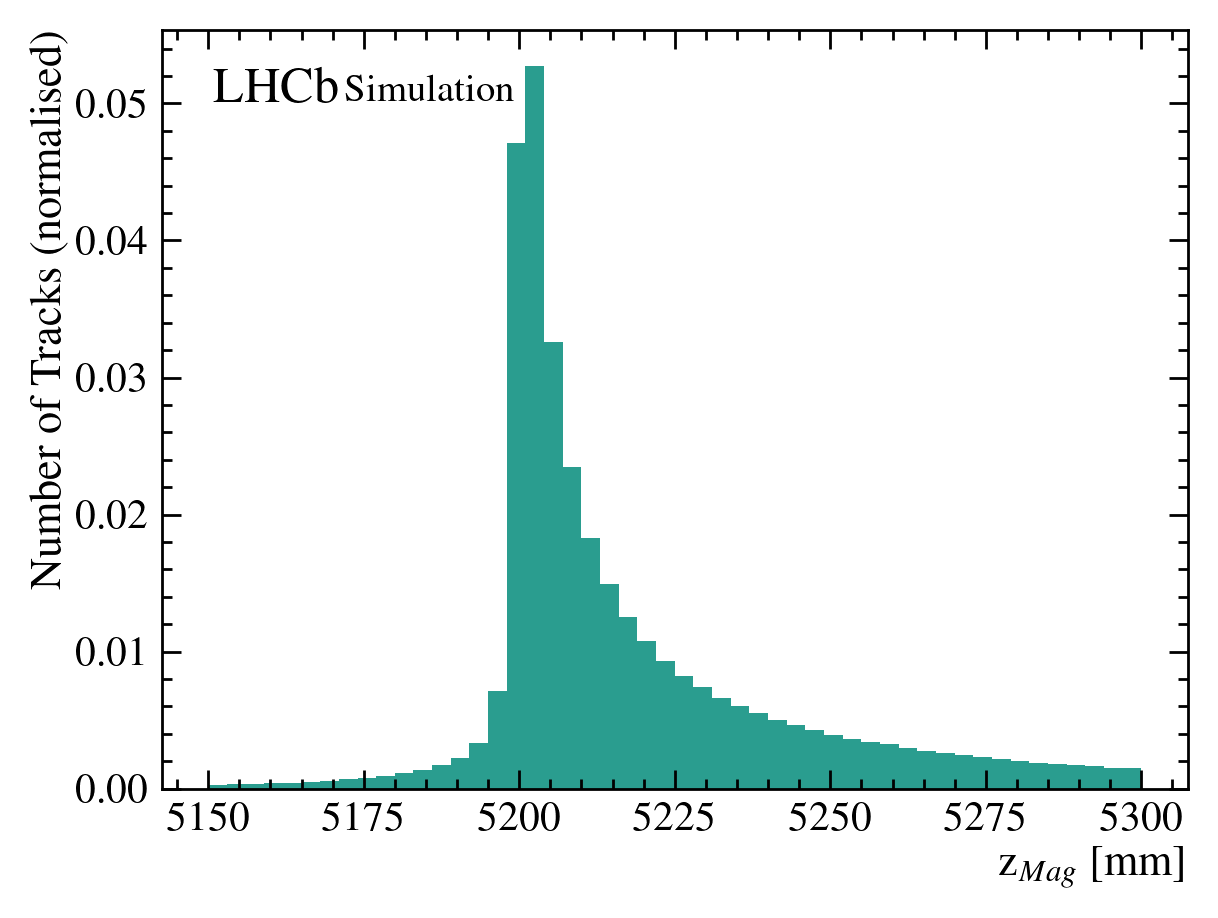

In [19]:
fig = plt.figure()
plt.hist(array["z_mag_x_fringe"], bins=50,
        range=[5150,5300], color='#2A9D8F', density=True)
plt.xlabel(r"z$_{Mag}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")

(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

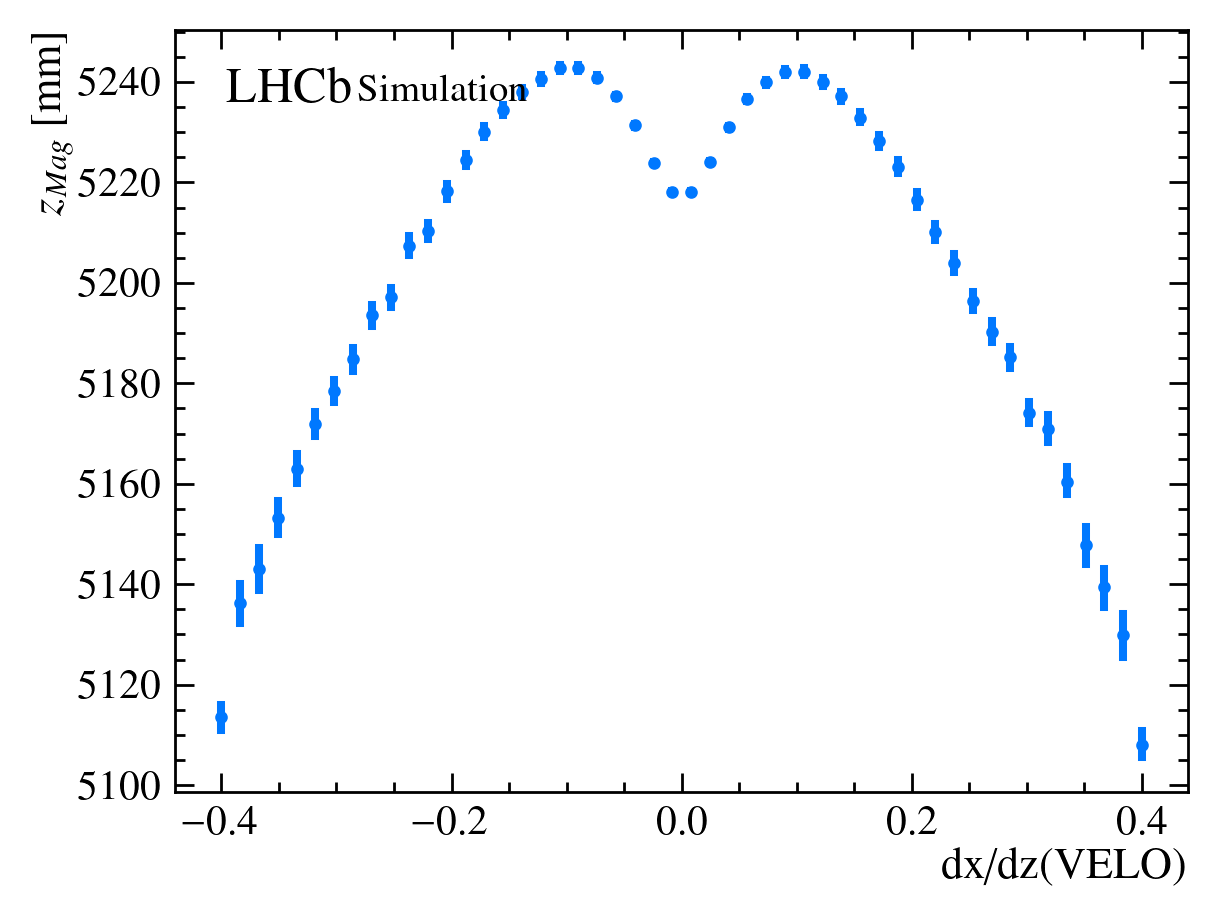

In [20]:
bins = np.linspace( -0.4, 0.4, 50 )
sns.regplot(x=ak.to_numpy(array["tx"]), y=ak.to_numpy(array["z_mag_x_fringe"]), x_bins=bins, fit_reg=None, x_estimator=np.mean)
plt.xlabel("dx/dz(VELO)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")

(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

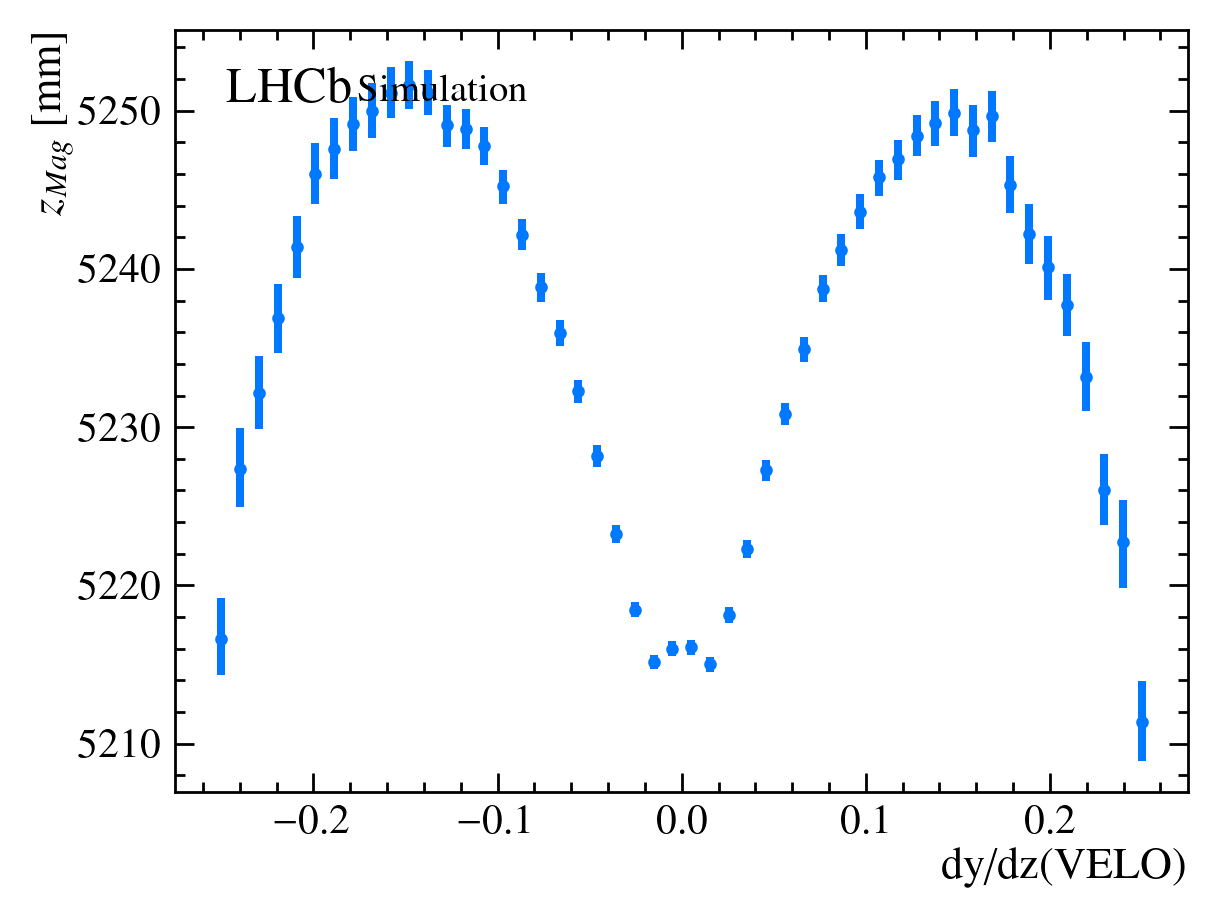

In [21]:
bins = np.linspace( -0.25, 0.25, 50 )
sns.regplot(x=ak.to_numpy(array["ty"]), y=ak.to_numpy(array["z_mag_x_fringe"]), x_bins=bins, fit_reg=None, x_estimator=np.mean)
plt.xlabel("dy/dz(VELO)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")

In [ ]:
#bins = np.linspace( -300, 300, 50 )
#sns.regplot(x=ak.to_numpy(array["x"]), y=ak.to_numpy(array["z_mag_x_fringe"]), x_bins=bins, fit_reg=None, x_estimator=np.mean)

In [ ]:
#bins = np.linspace( -300, 300, 50 )
#sns.regplot(x=ak.to_numpy(array["y"]), y=ak.to_numpy(array["z_mag_x_fringe"]), x_bins=bins, fit_reg=None, x_estimator=np.mean)

In [ ]:
#bins = np.linspace( -1.0, 1.0, 50 )
#sns.regplot(x=ak.to_numpy(array["dSlope_out"]), y=ak.to_numpy(array["z_mag_x"]), x_bins=bins, fit_reg=None, x_estimator=np.mean)

(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

/work/guenther/reco_tuner/env/tuner_env/envs/tuner/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


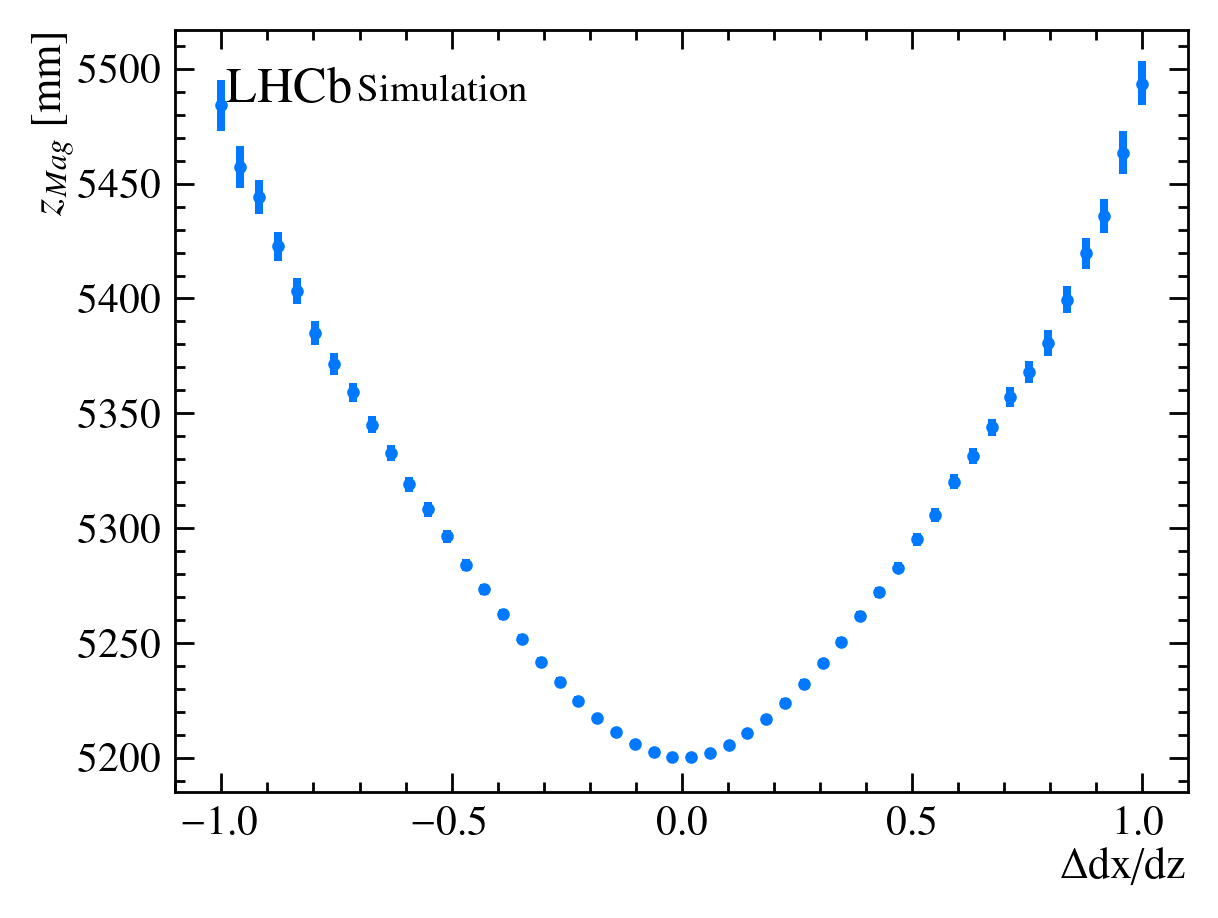

In [26]:
bins = np.linspace( -1, 1, 50 )
sns.regplot(x=ak.to_numpy(array["dSlope_fringe"]), y=ak.to_numpy(array["z_mag_x_fringe"]), x_bins=bins, fit_reg=None, x_estimator=np.mean)
plt.xlabel("$\Delta$dx/dz")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")

(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

/work/guenther/reco_tuner/env/tuner_env/envs/tuner/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


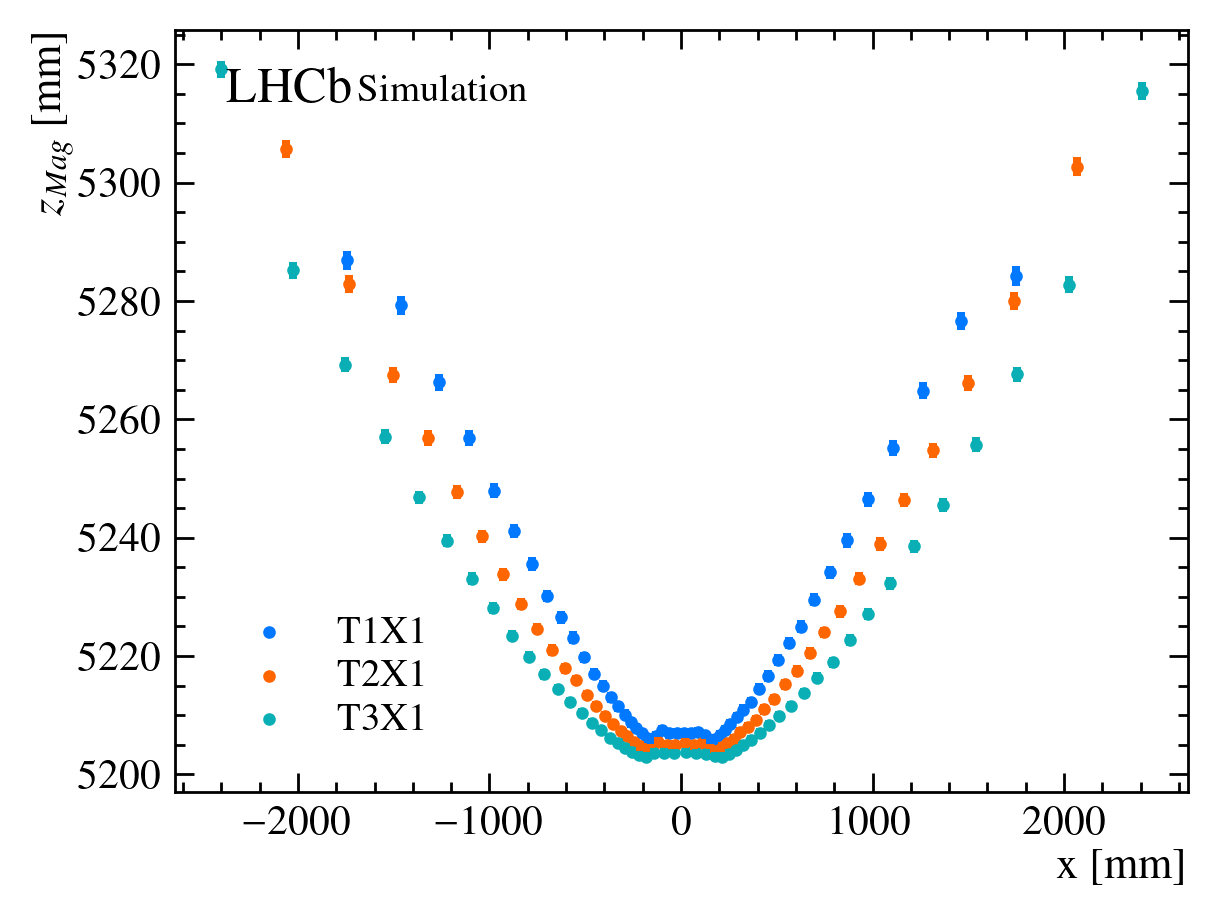

In [23]:
#import matplotlib.pyplot as plt
bins = np.linspace( -2000, 2000, 50 )
sns.regplot(x=ak.to_numpy(array["x_l0"]), y=ak.to_numpy(array["z_mag_x_fringe"]), x_bins=50, fit_reg=None, x_estimator=np.mean, label="T1X1")
sns.regplot(x=ak.to_numpy(array["x_l4"]), y=ak.to_numpy(array["z_mag_x_fringe"]), x_bins=50, fit_reg=None, x_estimator=np.mean, label="T2X1")
sns.regplot(x=ak.to_numpy(array["x_l8"]), y=ak.to_numpy(array["z_mag_x_fringe"]), x_bins=50, fit_reg=None, x_estimator=np.mean, label="T3X1")
plt.legend()
plt.xlabel("x [mm]")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
features = [
    "tx", 
    "ty", 
    "dSlope_fringe",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

poly_features = poly.get_feature_names_out(input_features=features)
keep = [
    #"tx",
    #"ty",
    #"dSlope_fringe",
    "tx^2",
    "tx dSlope_fringe",
    "ty^2",
    "dSlope_fringe^2"
]
remove = [i for i, f in enumerate(poly_features) if f not in keep]
X_train_model = np.delete( X_train_model, remove, axis=1)
X_test_model = np.delete( X_test_model, remove, axis=1)
poly_features = np.delete(poly_features, remove )
print(poly_features)


lin_reg = LinearRegression()#Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly_features,lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))


['tx^2' 'tx dSlope_fringe' 'ty^2' 'dSlope_fringe^2']
intercept= 5205.144186525624
coef= {'tx^2': -320.7206595710594, 'tx dSlope_fringe': 702.1384894815535, 'ty^2': -316.36350963107543, 'dSlope_fringe^2': 441.59909857558097}
r2 score= 0.9604900589467942
RMSE = 8.772908410819978


(exptext: Custom Text(0.0, 1, 'LHCb'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'))

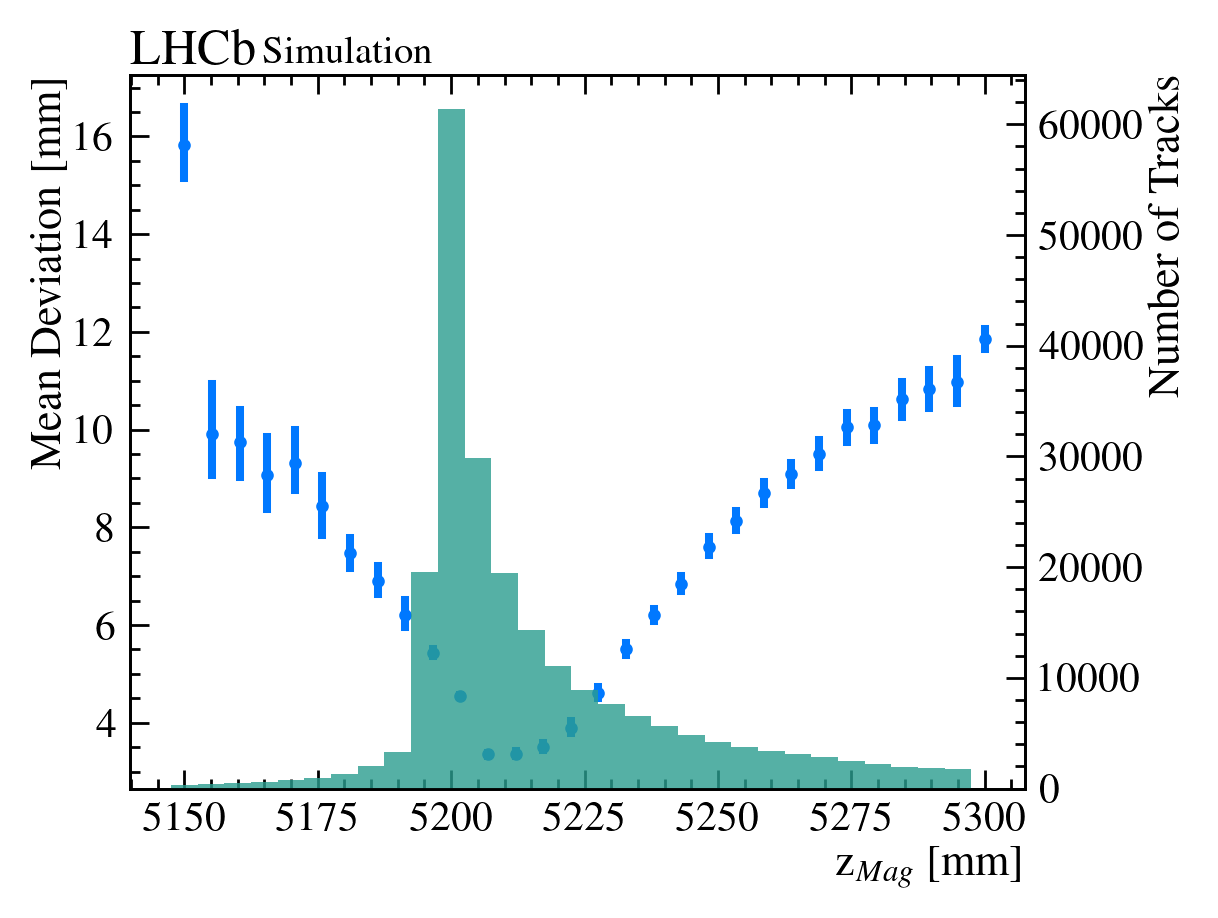

In [72]:
bins = np.linspace( 5150,5300, 30 )
ax = sns.regplot(x=y_test, y=abs(y_test-y_pred_test), x_bins=bins, fit_reg=None, x_estimator=np.mean, label="bla")
ax2 = ax.twinx()
ax2.hist(y_test, bins=30,
        range=[5150,5300], color='#2A9D8F', alpha=0.8, align='left')
ax.set_xlabel(r"z$_{Mag}$ [mm]")
ax.set_ylabel("Mean Deviation [mm]")
ax2.set_ylabel("Number of Tracks")
mplhep.lhcb.text("Simulation", loc=0)

In [ ]:
median_z_mag_x = np.median(array["z_mag_x_fringe"])
print(median_z_mag_x)
params_per_layer = [[] for _ in range(12)]

In [ ]:
def format_array(name, intercept, coef):
    coef = [str(c)+"f" for c in coef if c != 0.0]
    intercept = str(intercept) + "f"
    code = f"constexpr std::array {name}"
    code += "{" + ", ".join([intercept]+list(coef)) +"};"
    return code

In [ ]:

array["x_diff_straight_l0"] = array["x_l0"] - array["x"] - array["tx"] * ( array["z_l0"] - array["z"])
array["x_l0_rel"] = array["x_l0"] / 3000
features = [
    "tx", 
    "ty", 
    #"x_l0_rel",
    "x_diff_straight_l0",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 
poly_features = poly.get_feature_names_out(input_features=features)
keep = [
    #"tx",
    #"ty",
    #"x_l0_rel",
    "tx^2",
    #"tx x_l0_rel",
    "tx x_diff_straight_l0",
    "ty^2",
    #"x_l0_rel^2"
    "x_diff_straight_l0^2"
]
remove = [i for i, f in enumerate(poly_features) if f not in keep]
X_train_model = np.delete( X_train_model, remove, axis=1)
X_test_model = np.delete( X_test_model, remove, axis=1)
poly_features = np.delete(poly_features, remove )
print(poly_features)

lin_reg = LinearRegression()#Lasso(alpha=0.004)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly_features, lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l0", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[0] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l1_rel"] = array["x_l1"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l1_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l1", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[1] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l2_rel"] = array["x_l2"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l2_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l2", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[2] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l3_rel"] = array["x_l3"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l3_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l3", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[3] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l4_rel"] = array["x_l4"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l4_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l4", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[4] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l5_rel"] = array["x_l5"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l5_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l5", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[5] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l6_rel"] = array["x_l6"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l6_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l6", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[6] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l7_rel"] = array["x_l7"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l7_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l7", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[7] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l8_rel"] = array["x_l8"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l8_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l8", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[8] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l9_rel"] = array["x_l9"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l9_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l9", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[9] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l10_rel"] = array["x_l10"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l10_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l10", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[10] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
array["x_l11_rel"] = array["x_l11"] / 3000
features = [
    "tx", 
    "ty", 
    "x_l11_rel",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

lin_reg = Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly.get_feature_names_out(input_features=features),lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_l11", lin_reg.intercept_, lin_reg.coef_))
params_per_layer[11] = [lin_reg.intercept_] + list(lin_reg.coef_)

In [ ]:
features = [
    "tx", 
    "ty", 
    "dSlope_fringe",
]
target_feat = "z_mag_x_fringe"

data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform( X_train ) 
X_test_model = poly.fit_transform( X_test ) 

poly_features = poly.get_feature_names_out(input_features=features)
keep = [
    #"tx",
    #"ty",
    #"dSlope_fringe",
    "tx^2",
    "tx dSlope_fringe",
    "ty^2",
    "dSlope_fringe^2"
]
remove = [i for i, f in enumerate(poly_features) if f not in keep]
X_train_model = np.delete( X_train_model, remove, axis=1)
X_test_model = np.delete( X_test_model, remove, axis=1)
poly_features = np.delete(poly_features, remove )
print(poly_features)


lin_reg = LinearRegression()#Lasso(alpha=0.01)
lin_reg.fit( X_train_model, y_train)
y_pred_test = lin_reg.predict( X_test_model )
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly_features,lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))
print(format_array("zMagnetParams_dSlope", lin_reg.intercept_, lin_reg.coef_))

In [ ]:
import scipy.optimize
def parabola(x, a,b,c):
     return a*x**2 + b * x + c
params_1 = np.array([p[1] / params_per_layer[0][1] for p in params_per_layer])
x = [array[f"z_l{n}"][0] - array["z_ref"][0] for n in range(12)]
print(params_1)
print(x)
plt.plot(x, params_1, 'o')

In [ ]:
params_3 = np.array([params_per_layer[0][3] / p[3] for p in params_per_layer])
x = [array[f"z_l{n}"][0] - array["z_ref"][0] for n in range(12)]
print(params_3**2)
print(x)
plt.plot(x, params_3, 'o')

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
feautures = ["tx", "ty", "dSlope"]
data = np.column_stack([ak.to_numpy(array[feat]) for feat in features])
target = ak.to_numpy(array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=42,
)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_model = poly.fit_transform(X_train)
X_test_model = poly.fit_transform(X_test)
lin_reg = LinearRegression() # or Lasso if regularisation is needed
lin_reg.fit(X_train_model, y_train)
y_pred_test = lin_reg.predict(X_test_model)
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))